## Introduction

The purpose of this notebook is to serve as a simple run of XGBoost on the Tecator data set.

We offload most of the computation to `scripts/08_rf.py` and only pull in plots and results in this notebook.

## Imports

In [1]:
from IPython.display import Image
import os
from pathlib import Path
import pickle
import statistics

## Run the script `scripts/02_ridge.py`

This script runs some ridge models and saves results for a quick analysis. Expect this script to run for a few minutes (19 for me).

In [2]:
# Define the data directory to save to.
project_root = Path.cwd().resolve().parent
output_directory = project_root / "artifacts" / "original_data" / "08_xgb"

# Define the data directory to read from.
data_location_directory = project_root / "data" / "original"
artifacts_location_directory = project_root / "artifacts" / "original_data"

%run ../scripts/08_xgb.py --out-dir "{output_directory}" --data-location-directory "{data_location_directory}" --artifacts-location-directory "{artifacts_location_directory}"

/home/nicholas/Documents/Research_2025-26/tecator-fda/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nicholas/Documents/Research_2025-26/tecator-fda/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nicholas/Documents/Research_2025-26/tecator-fda/.venv/lib/python3.12/site-packages/xgboost/core.py", line 751, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/nicholas/Documen

## Evaluate repeated CV $R^{2}$

We now repeat a similar experiment as in the end of the notebook `01_ols.ipynb`. We run 10-fold CV ridge regression 10 times to get 100 different generalization $R^{2}$ estimates. This means for each of the 100 estimates, we have CV train and test sets. We take each train set and perform another 10-fold CV to choose the best random forest hyperparameters, then evaluate the resulting random forest on the test set. We report the median, mean, standard deviation, and boxplot of the 100 resulting $R^{2}$ values.

OLS CV R^2 median: 0.9579
OLS CV R^2 mean: 0.9308
OLS CV R^2 standard deviation: 0.0773

Ridge CV R^2 median: 0.9666
Ridge CV R^2 mean: 0.9547
Ridge CV R^2 standard deviation: 0.0431

FLR CV R^2 median: 0.962
FLR CV R^2 mean: 0.9574
FLR CV R^2 standard deviation: 0.0222

RF CV R^2 median: 0.6855
RF CV R^2 mean: 0.6363
RF CV R^2 standard deviation: 0.2054

XGB CV R^2 median: 0.7053
XGB CV R^2 mean: 0.6443
XGB CV R^2 standard deviation: 0.2804



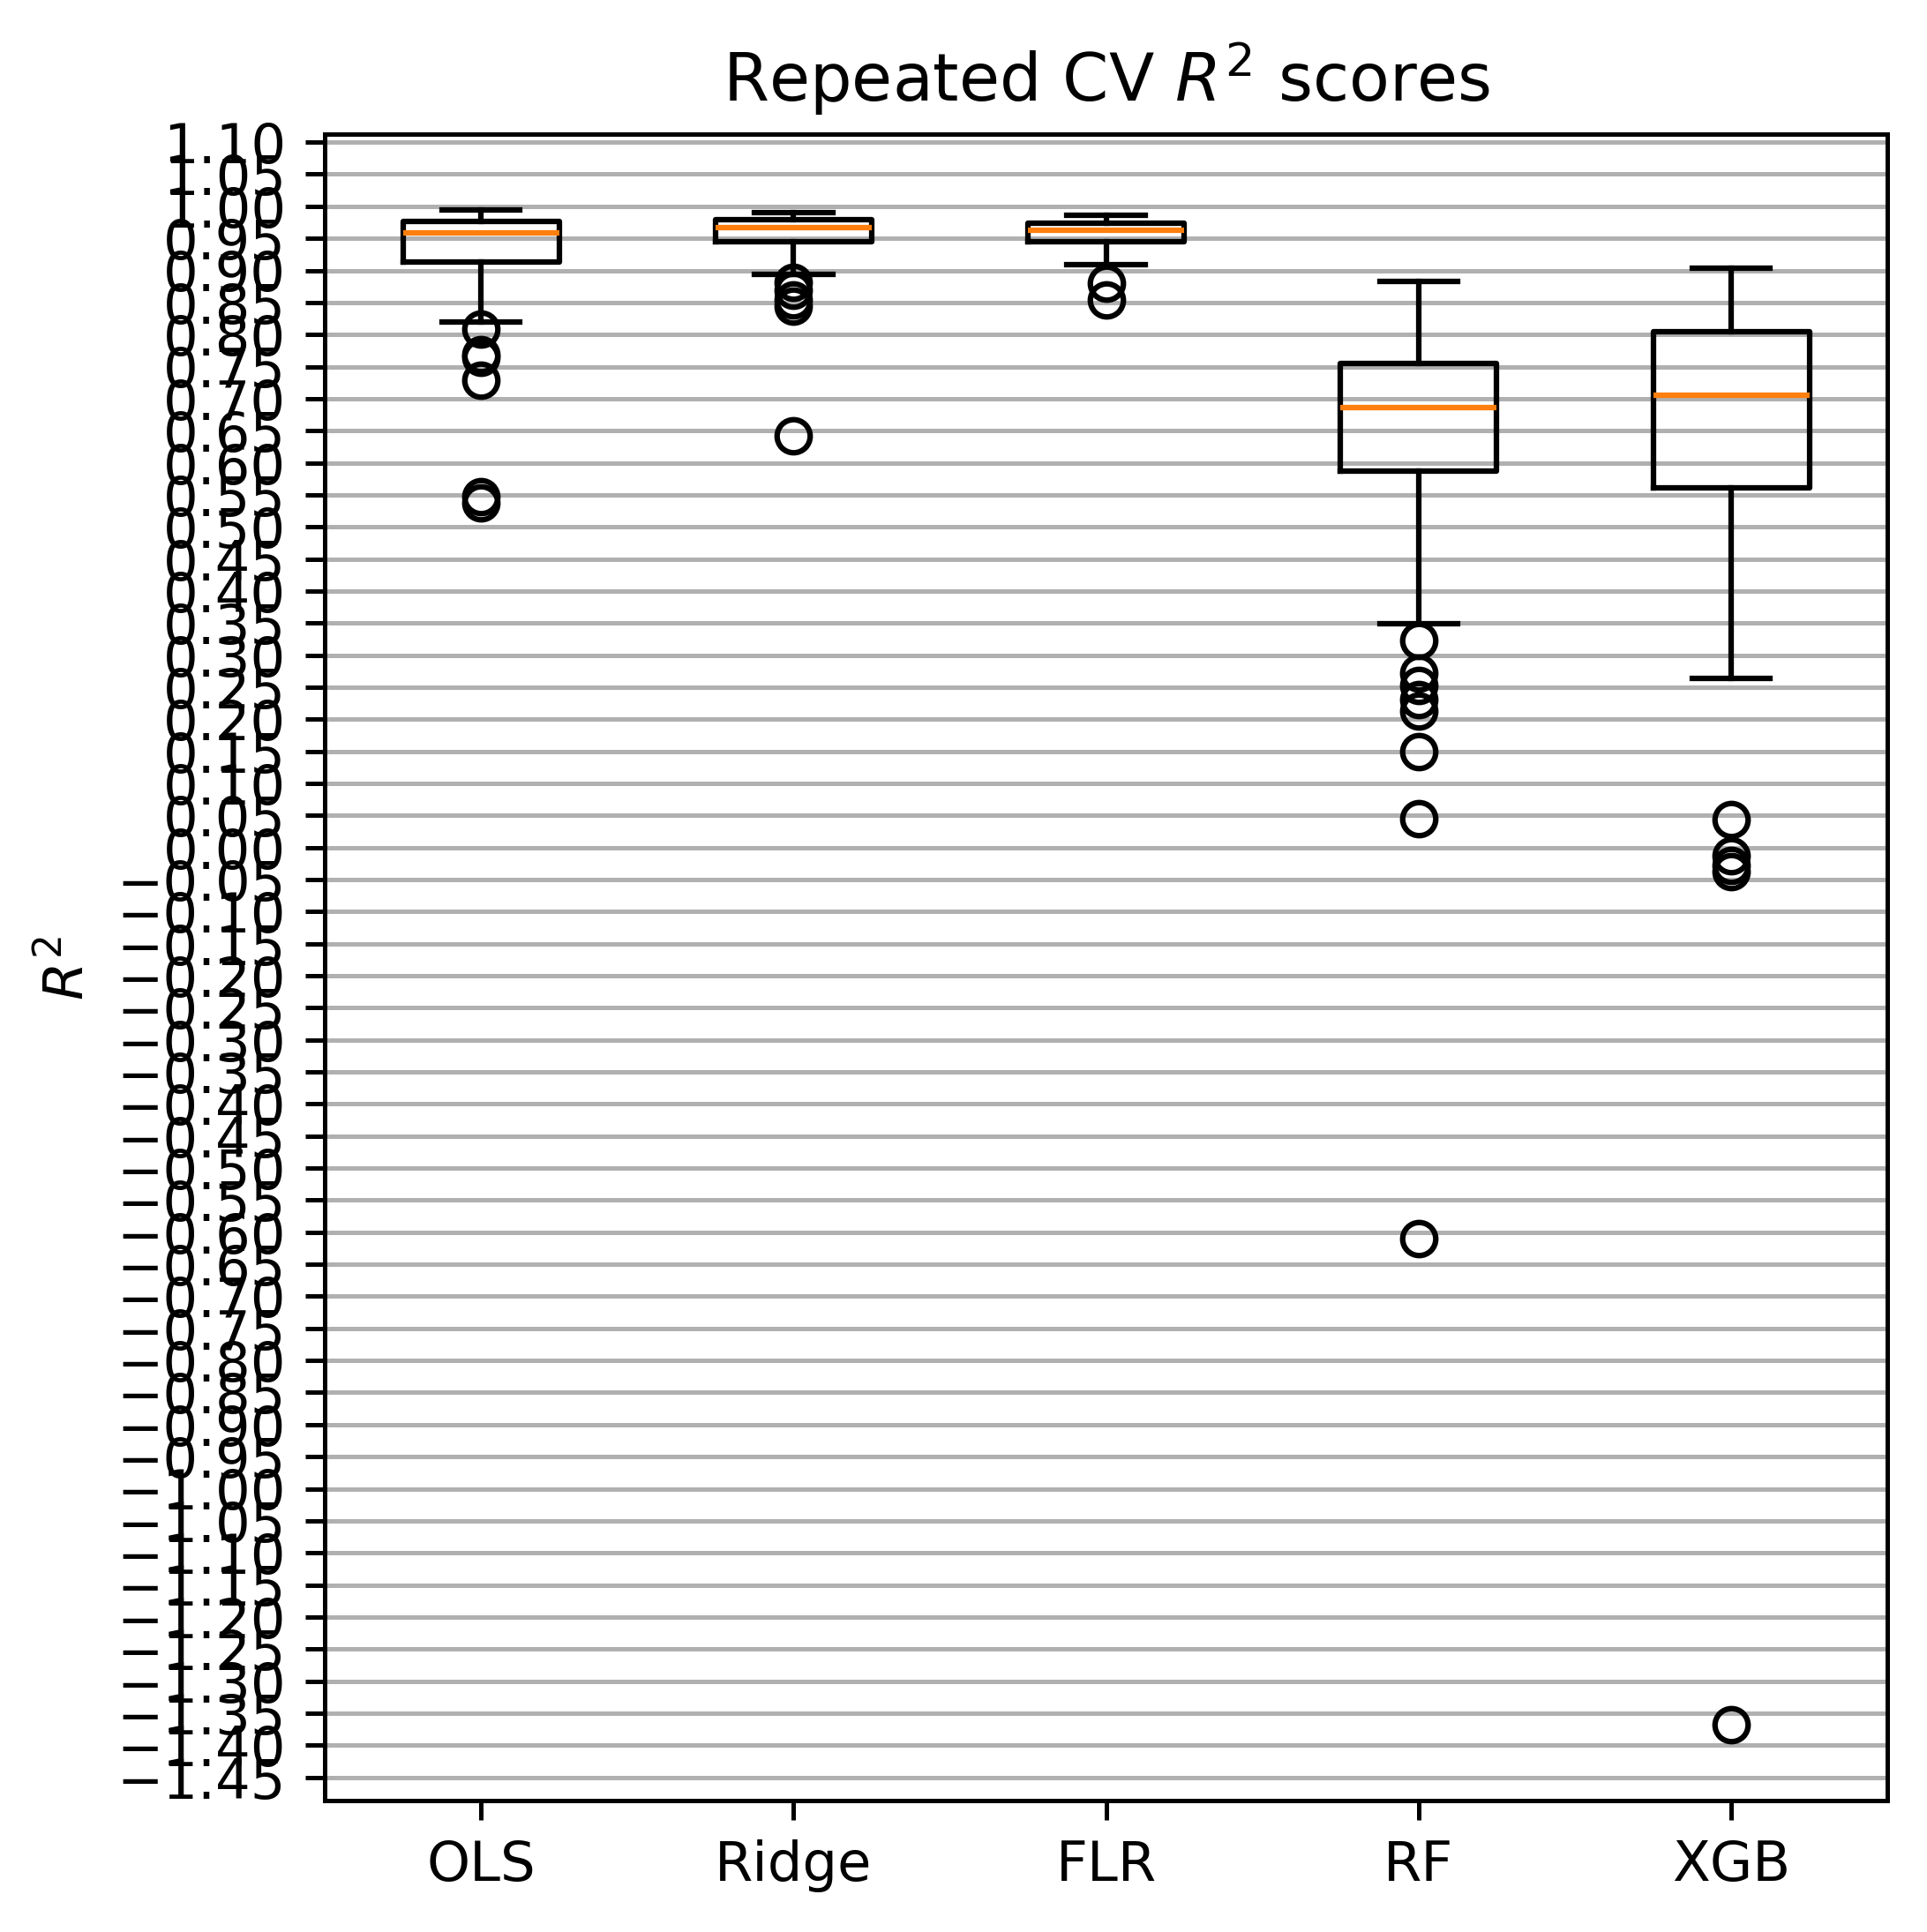

In [4]:
# Load the R^2 scores for both OLS, Ridge, FLR, and RF.
with open(str((Path(os.getcwd()).parent / "artifacts" / "original_data" / "01_ols" / "results" / "ols_cv.pkl")), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
    ols_cv_scores = pickle.load(f).r2_scores

with open(str((Path(os.getcwd()).parent / "artifacts" / "original_data" / "02_ridge" / "repeated_cv_results" / "results.pkl")), "rb") as f:
    ridge_cv_scores = pickle.load(f)

with open(str((Path(os.getcwd()).parent / "artifacts" / "original_data" / "03_flr" / "repeated_cv_results" / "results.pkl")), "rb") as f:
    flr_cv_scores = pickle.load(f)["r2_scores"]

with open(str((Path(os.getcwd()).parent / "artifacts" / "original_data" / "06_rf" / "repeated_cv_results" / "results.pkl")), "rb") as f:
    rf_cv_scores = pickle.load(f)

with open(str((Path(os.getcwd()).parent / "artifacts" / "original_data" / "08_xgb" / "repeated_cv_results" / "results.pkl")), "rb") as f:
    xgb_cv_scores = pickle.load(f)

print("OLS CV R^2 median:", round(statistics.median(ols_cv_scores), 4))
print("OLS CV R^2 mean:", round(ols_cv_scores.mean(), 4))
print("OLS CV R^2 standard deviation:", round(ols_cv_scores.std(), 4))
print()
print("Ridge CV R^2 median:", round(statistics.median(ridge_cv_scores), 4))
print("Ridge CV R^2 mean:", round(ridge_cv_scores.mean(), 4))
print("Ridge CV R^2 standard deviation:", round(ridge_cv_scores.std(), 4))
print()
print("FLR CV R^2 median:", round(statistics.median(flr_cv_scores), 4))
print("FLR CV R^2 mean:", round(flr_cv_scores.mean(), 4))
print("FLR CV R^2 standard deviation:", round(flr_cv_scores.std(), 4))
print()
print("RF CV R^2 median:", round(statistics.median(rf_cv_scores), 4))
print("RF CV R^2 mean:", round(rf_cv_scores.mean(), 4))
print("RF CV R^2 standard deviation:", round(rf_cv_scores.std(), 4))
print()
print("XGB CV R^2 median:", round(statistics.median(xgb_cv_scores), 4))
print("XGB CV R^2 mean:", round(xgb_cv_scores.mean(), 4))
print("XGB CV R^2 standard deviation:", round(xgb_cv_scores.std(), 4))
print()

Image(filename=str(artifacts_location_directory / "08_xgb" / "plots" / "comparison.png"), width=400)